# Data Science in Health Care Code

In the following, the code to answer the research questions will be presented. It begins with a Data Visualization section in order to gain a comprehensive understanding of the dataset. Then follows the Data Analysis section, where each research question is addressed.

You can find the code for our stremlit app here:

https://github.com/ansamz/Heart_Disease_Streamlit_App

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Questions</a></span></li><li><span><a href="#Preparatory-work" data-toc-modified-id="Preparatory-work-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparatory work</a></span></li><li><span><a href="#Data-Visualization-/-Explanatory-Data-Analysis" data-toc-modified-id="Data-Visualization-/-Explanatory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualization / Explanatory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Pair-plot" data-toc-modified-id="Pair-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pair plot</a></span></li><li><span><a href="#Count-plot" data-toc-modified-id="Count-plot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Count plot</a></span></li><li><span><a href="#Bar-plot" data-toc-modified-id="Bar-plot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Bar plot</a></span></li><li><span><a href="#Pie-chart-and-Histogram" data-toc-modified-id="Pie-chart-and-Histogram-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Pie chart and Histogram</a></span></li><li><span><a href="#Horizontal-Bar-Chart" data-toc-modified-id="Horizontal-Bar-Chart-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Horizontal Bar Chart</a></span></li><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Correlation matrix</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Random-Search" data-toc-modified-id="Random-Search-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random Search</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Grid search</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#Partial-Dependence-Display" data-toc-modified-id="Partial-Dependence-Display-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Partial Dependence Display</a></span></li></ul></li></ul></div>

## Questions

To recall the subject of the study, we aim to answer the main question—**Can we predict heart disease in patients using their health metrics?** Additionally, we will address the following subquestions:

1. Which health metrics demonstrate the highest correlation with heart disease risk?
2. How does age and gender influence the likelihood of developing heart disease?
3. To what extent does the performance of our predictive model vary across different patient profiles?

## Preparatory work

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Please check the attached `requirements.txt` file to install all the required libraries

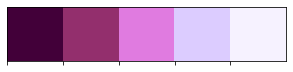

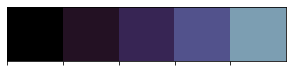

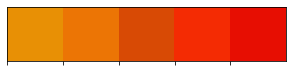

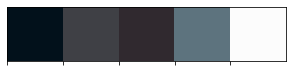

In [2]:
# Color pallets
purple_shades = ['#420039', '#932F6D', '#E07BE0', '#DCCCFF', '#F6F2FF']
black_to_blue = ['#000000', '#231123', '#372554', '#52528C', '#7C9EB2']
orange_red_mix = ['#E89005', '#EC7505', '#D84A05', '#F42B03', '#E70E02']
black_mix = ['#02111B', '#3F4045', '#30292F', '#5D737E', '#FCFCFC']

sns.palplot(purple_shades)
sns.palplot(black_to_blue)
sns.palplot(orange_red_mix)
sns.palplot(black_mix)

Load the dataset:

In [3]:
# import the data 
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [4]:
# calculate summary statistics for the dataset using the describe() method.
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
# fix the names of columns because they have spaces to be easier to select them
data.columns = data.columns.str.replace(' ', '_')

In [6]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [7]:
# let's have a look at a snippet of the data
data.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
# which different unique values are in the st_slope column?
data.ST_slope.unique()

array([1, 2, 3, 0], dtype=int64)

In [9]:
# this is surprising because in the explanation of the data there is no zero so we investigate further to check how many zero st_slope are
data.ST_slope.value_counts()

ST_slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64

In [10]:
# 0 in ST_slope has no meaning in the dataset and there is one row containing it according to the visualizations we did below
# so it might be an error and we decided to remove this row
data = data[data['ST_slope'] != 0]

In [11]:
# check for missing values
data.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
target                 0
dtype: int64

We don't have missing data

## Data Visualization / Explanatory Data Analysis

### Pair plot

Let's explore the relationships between variables in a dataset.

Using a pair plot helped us identify various patterns such as linear relationships (positive or negative correlations), clusters, or non-linear associations between variables. This is super helpful to understand the underlying structure of the data.

This visualization is also crucial when there are a lot of features and we would like to do preliminary feature selection. We can identify which variables seem to have the most significant impact on the target variable or are strongly related to each other.

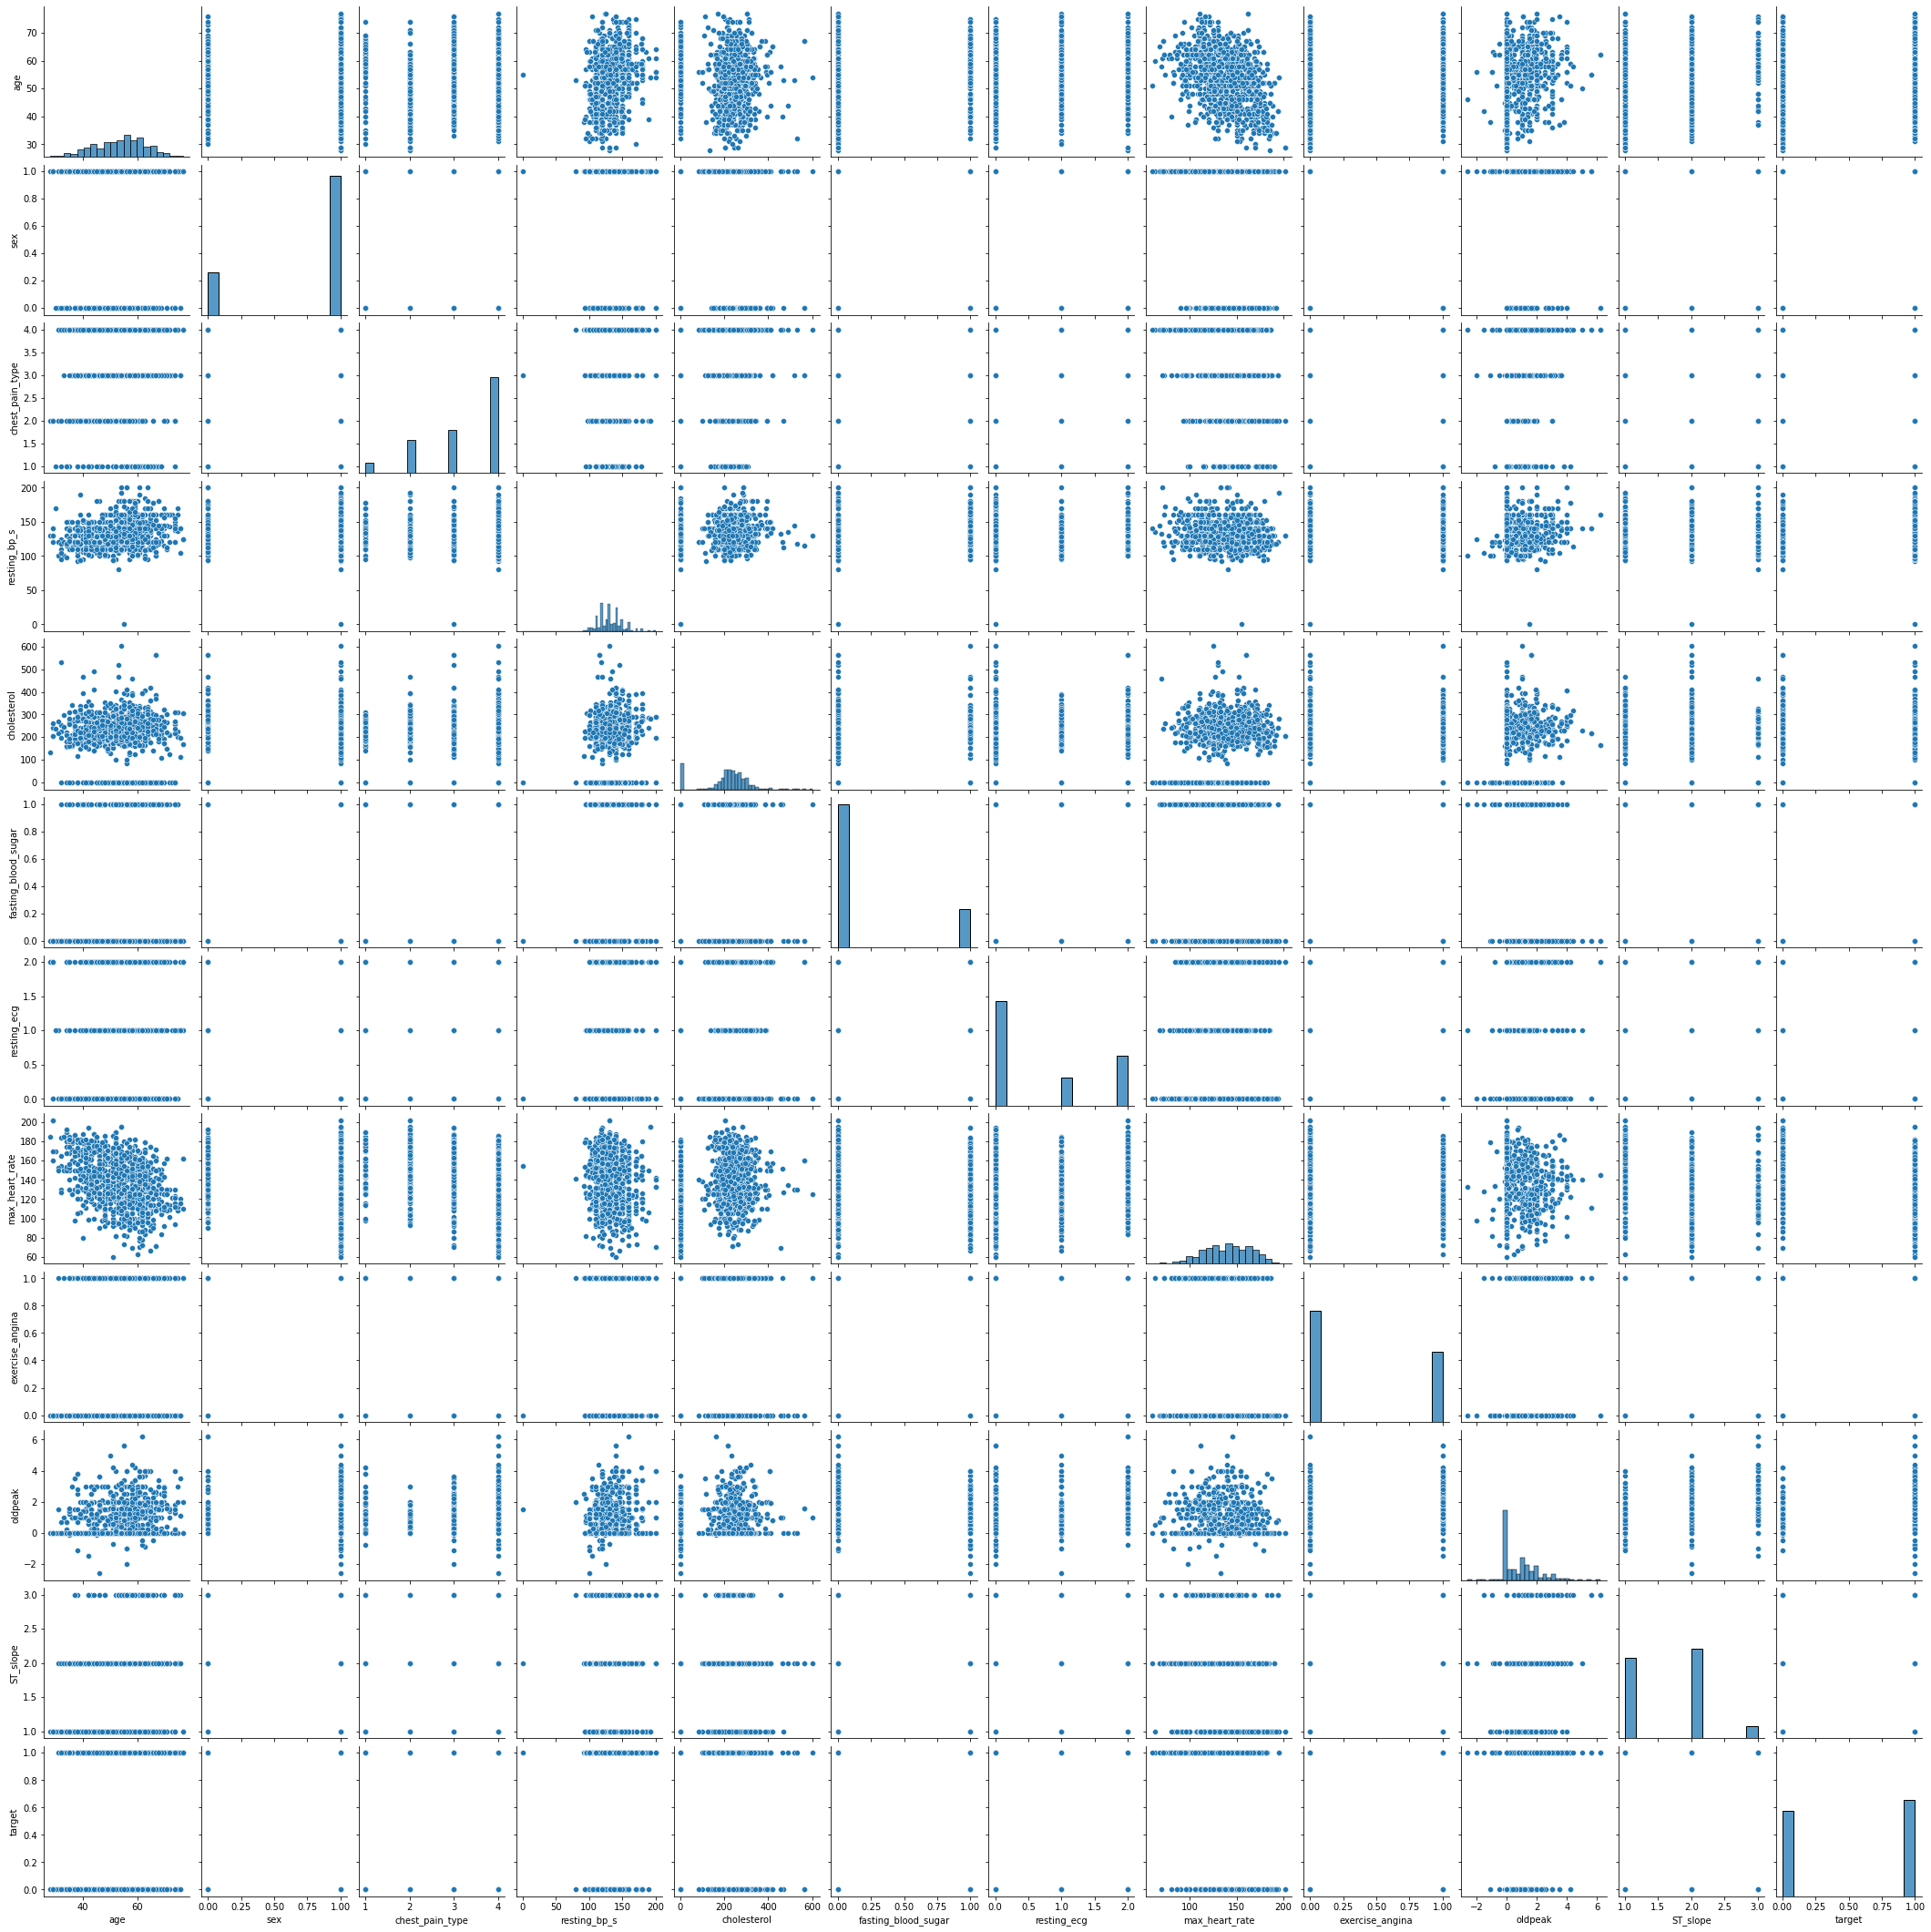

In [12]:
sns.pairplot(data)

### Count plot

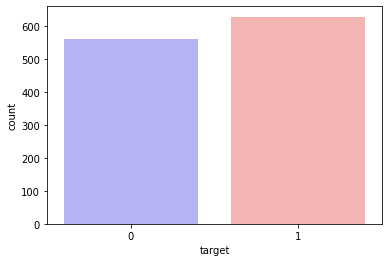

In [13]:
# create a countplot-Diagramm
# x ="target" the target variable shows 0 for no disease and 1 for heart disease 
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

We don't have class imbalance

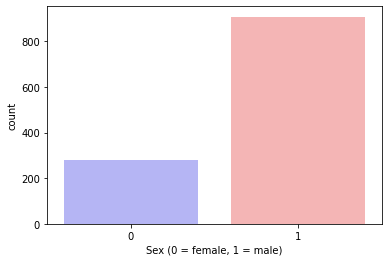

In [14]:
# Create a countplot to show the counts or frequency of both sexes in our dataset.
# 0 for female / 1 for male.
sns.countplot(x='sex', data=data, palette="bwr")

# Set the x-axis label for better clarity
plt.xlabel("Sex (0 = female, 1 = male)")

# Display the plot
plt.show()

The majority is male, about a quarter of the records are female.

### Bar plot

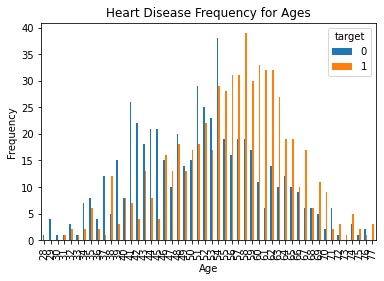

In [15]:
# Create a bar plot to visualize the frequency of heart disease cases across different ages
# using a cross-tabulation (crosstab) of 'age' and 'target' columns from the 'data' DataFrame.
pd.crosstab(data.age, data.target).plot(kind="bar")
# label the title and the axis
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This plot raised the question wethere there is a difference between male and female in when it comes to heart disease and age:

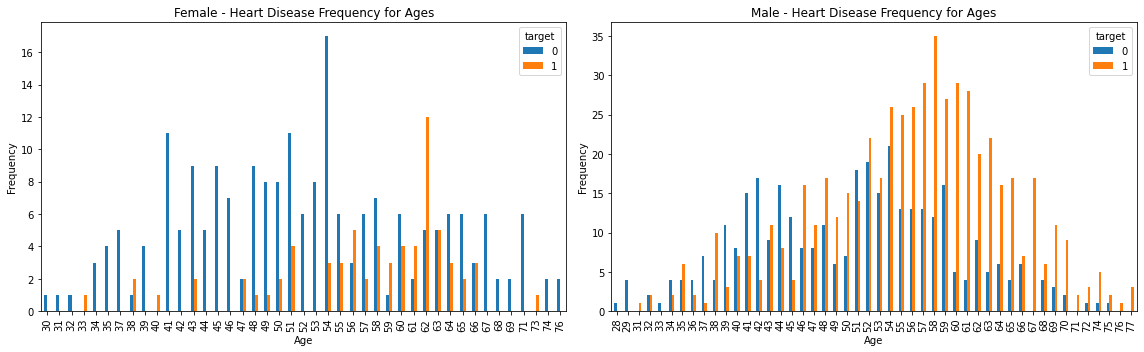

In [16]:
# so we do the same for male female with heart disease and age distribution
# Split the data into female and male data
female_data = data[data['sex'] == 0]
male_data = data[data['sex'] == 1]

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the female data in the first subplot
pd.crosstab(female_data.age, female_data.target).plot(kind="bar", ax=axes[0])
axes[0].set_title('Female - Heart Disease Frequency for Ages')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot the male data in the second subplot
pd.crosstab(male_data.age, male_data.target).plot(kind="bar", ax=axes[1])
axes[1].set_title('Male - Heart Disease Frequency for Ages')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Chest pain is known to be a well known indicator of heart problems, let's look at the frequency in our dataset

### Pie chart and Histogram

Total Chest Pain Type: 


chest_pain_type
4    625
3    282
2    216
1     66
Name: count, dtype: int64

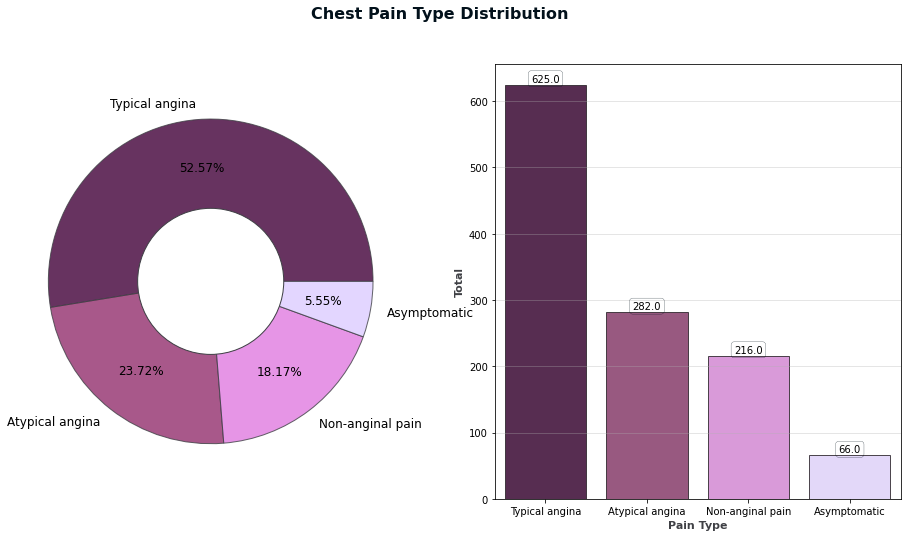

In [17]:
# chest pain
colors=purple_shades[0:4]
labels=['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
order=data['chest_pain_type'].value_counts().index

plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_mix[0])

# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(data['chest_pain_type'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_mix[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_mix[1])

plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
ax = sns.countplot(x='chest_pain_type', data=data, palette=colors, order=order,
                   edgecolor=black_mix[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_mix[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_mix[1])

plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_mix[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('Total Chest Pain Type: ')
data['chest_pain_type'].value_counts(dropna=False)


Another intruiging variable is the st_slope in ecg test, here we are investigating further than the frequency but look at the frequency according to the presense of absense of heart disease:

### Horizontal Bar Chart

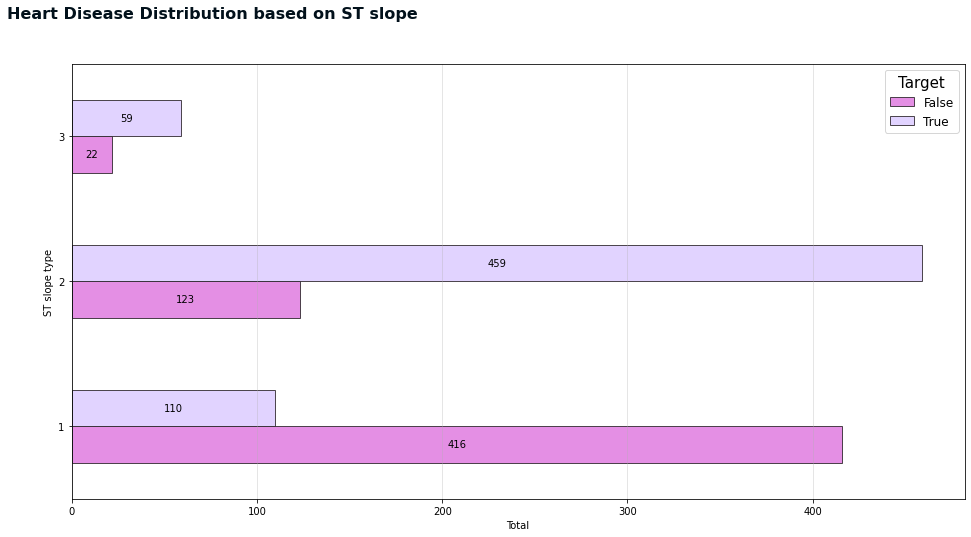

In [18]:
# Define labels for the 'False' and 'True' categories
labels = ['False', 'True']

# Horizontal Bar Chart
# Generate a horizontal bar chart using pandas crosstab
ax = pd.crosstab(data['ST_slope'], data['target']).plot(kind='barh', 
                                        figsize=(16, 8), 
                                        color=purple_shades[2:4],
                                        edgecolor=black_mix[2], alpha=0.85)

# Add labels to the bars in the horizontal bar chart
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text(x + width/2, y + height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

# Set the super title for the chart
plt.suptitle('Heart Disease Distribution based on ST slope', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_mix[0])

# Set labels for the x and y axes
plt.xlabel('Total')
plt.ylabel('ST slope type')

# Add grid lines to the x-axis and remove y-axis grid lines
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)

# Add a legend to the chart with specified labels and styling
plt.legend(labels=labels, title='Target', fontsize='12', frameon=True,
           title_fontsize='15', loc='upper right');


Which health metrics demonstrate the highest correlation with heart disease risk?

In [19]:
# Extract the relevant columns for the analysis (without the target variable)
# Define a list of relevant feature column names for the analysis
features = ['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar',
            'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak',
            'ST_slope']

# dataframe with relevant features
# data_subset = data[features]

# Create a DataFrame with the relevant variables
data_subset = data[features].copy() # This extracts and copies the selected feature columns from the original DataFrame.

# add the target variable to the new df 
data_subset['heart_disease'] = data['target']

### Correlation matrix

In [20]:
# Calculate the correlation matrix for the selected features
correlation_matrix = data_subset.corr()
# The correlation matrix shows how each feature is correlated with every other feature.

# Find the correlations with the target variable
correlations_with_target = correlation_matrix['heart_disease'].drop('heart_disease')
# This line extracts the correlations of each feature with the target variable ('heart_disease').

# Sort the correlations in descending order to show the highest first
sorted_correlations = correlations_with_target.abs().sort_values(ascending=False)

print("Highest correlation with heart disease:")
print(sorted_correlations)
# display the feature correlations, starting with the highest correlations.

Highest correlation with heart disease:
ST_slope               0.509433
exercise_angina        0.482407
chest_pain_type        0.460509
max_heart_rate         0.413208
oldpeak                0.399331
sex                    0.310982
age                    0.261170
fasting_blood_sugar    0.215585
cholesterol            0.198322
resting_bp_s           0.120736
resting_ecg            0.073745
Name: heart_disease, dtype: float64


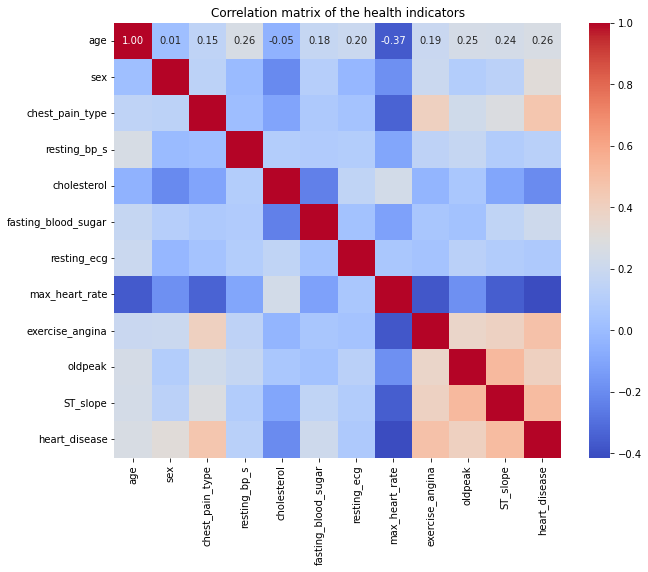

In [21]:
# Correlation Heatmap
# Create a heatmap to visualize the correlation between variables in the Dataframe
# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # rounding to two decimal places
plt.title('Correlation matrix of the health indicators')
plt.show()

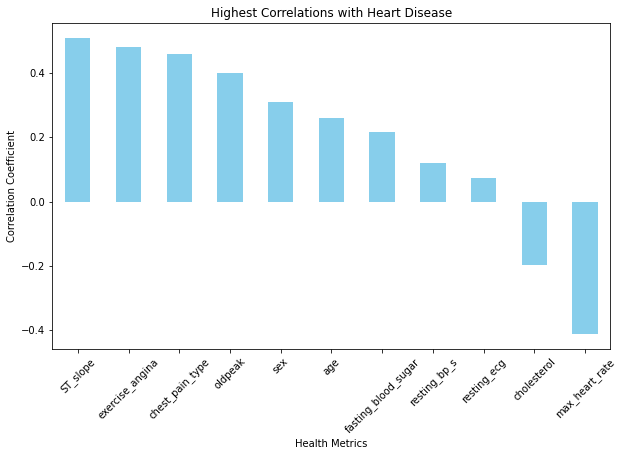

In [22]:
# Sort the correlations in descending order
sorted_correlations = correlations_with_target.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sorted_correlations.plot(kind='bar', color='skyblue')
plt.xlabel('Health Metrics')
plt.ylabel('Correlation Coefficient')
plt.title('Highest Correlations with Heart Disease')
plt.xticks(rotation=45)
plt.show()

Negative relationship between heart disease and cholesterol and max heart rate: this means that when one variable increases, the other decreases, and vice versa. In terms of heart disease (as mentioned in the sample code), this could mean that an increase in a particular health metric is associated with a decrease in the likelihood of heart disease.

**Answer Question 1: Which health metrics demonstrate the highest correlation with heart disease risk?**

The correlation matrix shows well which values influence heart disease and which less. **ST_slope, exercise_angina and chest_pain_type** show the highest correlation values and thus seem to have a large influence. If the correlation coefficient between a particular variable and the target variable is negative (close to -1), it means that an increase in the values of this variable is more likely to be associated with a decrease in the incidence of heart disease (0). We have negative correlations for **max_heart_rate and cholesterol**. 

## Modeling

**Main Question: Can we predict heart disease in patients using their health metrics?** 

Source code for visualizing the tree is from: 
https://mljar.com/blog/visualize-tree-from-random-forest/

In [23]:
def plot_roc(y_test, proba_preds):
    '''
    plot the ROC curve, calculate AUC for a base model and the AUC of our logistic regression model.
    '''
    # create linear line
    base_probs = [0 for _ in range(len(y_test))]

    base_auc = roc_auc_score(y_test, base_probs)
    lr_auc = roc_auc_score(y_test, proba_preds)

    # summarize scores
    print('Logistic: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, base_probs) # roc curve for the dummy model
    lr_fpr, lr_tpr, _ = roc_curve(y_test, proba_preds) # roc curve for your model

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Base')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

The **ROC Curve** in machine and deep learning is a graphical representation used to evaluate the performance of binary classification models. It illustrates the trade-off between the true positive rate, also known as Sensitivity, and the false positive rate (calculated as 100 minus Specificity) across various decision thresholds.

In essence, the ROC curve consists of multiple points, each denoting a specific sensitivity and specificity pair corresponding to a particular threshold for decision-making.

The area under the ROC curve (AUC) serves as a quantitative measure of a test's overall effectiveness, where a larger AUC indicates a more valuable test. The acronym ROC stands for Receiver Operating Characteristic, highlighting its utility in assessing and comparing the performance of different classification models.

In [24]:
def confusion_matrix_plot(cf):
    y_annot = ['No heart disease', 'Heart disease']
    x_annot = ['No heart disease', 'Heart disease']

    # change each element of z to type string for annotations
    z_text = [[str(y_annot) for y_annot in x_annot] for x_annot in cf]

    fig = ff.create_annotated_heatmap(cf, x=x_annot, y=y_annot, annotation_text=z_text, colorscale='Viridis')

    fig.update_layout(title_text='<i><b>Confusion matrix</b></i>'
                    )

    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted value",
                            xref="paper",
                            yref="paper"))

    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.35,
                            y=0.5,
                            showarrow=False,
                            text="Real value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    fig.update_layout(margin=dict(t=50, l=200), height=600, width=800)

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()

A **confusion matrix** is an essential tool in machine learning and statistics, particularly in medical diagnostics. It provides a detailed breakdown of a model's predictions compared to actual outcomes, including **true positives** (correctly identifying cases with a condition) and **true negatives** (correctly identifying cases without a condition). In medicine, true positives ensure timely treatment, while true negatives prevent unnecessary interventions. The matrix also highlights **false positives** (incorrectly identifying healthy individuals as having a condition) and **false negatives** (failing to diagnose actual cases). In healthcare, these metrics are critical for patient safety, treatment decisions, resource allocation, and quality assurance. Accurate diagnoses and reduced errors are vital for patient well-being and efficient healthcare delivery.

In [25]:
# Split the data into features (x) and the target variable (y)
x = data.drop(['target'], axis=1)  # 'x' contains all the features, excluding the 'target' column
y = data['target']  # 'y' contains the target variable

# Split the data into training and testing sets with an 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler() #try StandardScaler() and compare results
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')

# Train the model on the training data
lr_model.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(x_test_scaled)

# Calculate and print the accuracy
lr_acc = accuracy_score(y_pred_lr, y_test)
print('Logistic Regression Accuracy: {:.2f}%'.format(lr_acc*100))

Logistic Regression Accuracy: 84.87%


In [27]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       105
           1       0.86      0.87      0.87       133

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



In [28]:
# create the confusion matrix
cf = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_plot(cf)

Logistic: ROC AUC=0.922


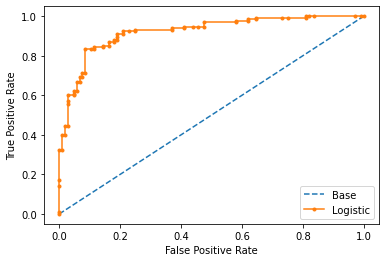

In [29]:
# Predict and plot ROC curve for logistic regression model.
proba_pred = lr_model.predict_proba(x_test_scaled)[:, 1]
plot_roc(y_test, proba_pred)

In [30]:
# Random forest

# Create a Random Forest classifier model with specified parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)
# n_estimators sets the number of decision trees in the ensemble.
# max_depth controls the maximum depth of each tree in the forest.

# Train the Random Forest model on the training data
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=3)

In [31]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
# Random Forest Predictions and Accuracy

# Make predictions on the test data using the trained Random Forest modely_pred_rf = rf_model.predict(x_test_scaled)
y_pred_rf = rf_model.predict(x_test_scaled)

# Calculate the accuracy of the Random Forest model
rf_acc = accuracy_score(y_pred_rf, y_test)
# accuracy_score is a function that measures the accuracy of the model's predictions.

# Print the accuracy of the Random Forest model
print('Random Forest Accuracy: {:.2f}%'.format(rf_acc*100))

Random Forest Accuracy: 88.24%


In [33]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.90      0.89      0.89       133

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



In [34]:
cf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_plot(cf)

Logistic: ROC AUC=0.937


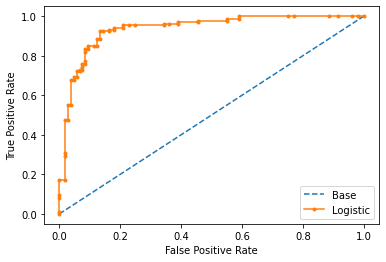

In [35]:
proba_pred = rf_model.predict_proba(x_test_scaled)[:, 1]
plot_roc(y_test, proba_pred)

### Random Search

It is a technique used in machine learning for hyperparameter optimization. It involves creating a grid of hyperparameters and testing the model on random combinations of these parameters. Cross-Validation is often applied to the training set to ensure the model doesn't overfit. K-Fold Validation is a common Cross-Validation method, where the training set is divided into N partitions, and the model is iteratively trained on N-1 partitions and tested on the remaining one, with results averaged across iterations. Using Cross-Validation in hyperparameter optimization helps ensure that the chosen hyperparameters perform well on unseen data. Random Search begins by defining a grid of hyperparameters that are randomly sampled during the optimization process.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

rf_model_tuned = RandomForestClassifier(random_state=42)

random_search = {
                  'criterion': ['entropy', 'gini'],
                  'max_depth': [10, 20, None],
                  'max_features': ['sqrt', 'log2'],
                  'n_estimators': [50, 100, 200]
                 }

# 2 x 3 x 2 x 3 = 36 => randomly selects 10 combinations (models) from 36 possible model hyperparameter configs
# 1. RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', n_estimators=50)
# 2. RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2', n_estimators=200)
# ... total of n_iter models

random_search_obj = RandomizedSearchCV(estimator=rf_model_tuned, 
                           param_distributions=random_search, 
                           n_iter=10, # total number of models it will try out by random selections
                           scoring='f1',
                           cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_obj.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1', verbose=1)

In [37]:
# Once trained our model, we can then visualize how changing some of its Hyperparameters can affect the overall model accuracy. 
# In this case, we observe how changing the number of estimators and the criterion can affect our Random Forest accuracy.
best_model = random_search_obj.best_estimator_
best_model

RandomForestClassifier(n_estimators=50, random_state=42)

In [38]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [39]:
random_search_obj.best_params_

{'n_estimators': 50,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'gini'}

In [40]:
# detailed history of all models tried and their performance in cross validation
cv_result_df = pd.DataFrame({
    'Model Rank': random_search_obj.cv_results_['rank_test_score'],
    'Model Hyperparams': random_search_obj.cv_results_['params'],
    'Avg CV F1-Score': random_search_obj.cv_results_['mean_test_score'],
    'Std Dev CV F1-Score': random_search_obj.cv_results_['std_test_score'],
    'CV Fold 1 F1-Score': random_search_obj.cv_results_['split0_test_score'],
    'CV Fold 2 F1-Score': random_search_obj.cv_results_['split1_test_score'],
    'CV Fold 3 F1-Score': random_search_obj.cv_results_['split2_test_score'],
})


cv_result_df.sort_values(by=['Model Rank'], ascending=True)

,Model Rank,Model Hyperparams,Avg CV F1-Score,Std Dev CV F1-Score,CV Fold 1 F1-Score,CV Fold 2 F1-Score,CV Fold 3 F1-Score
3,1,"{'n_estimators': 50, 'max_features': 'sqrt', '...",0.907000,0.021684,0.928144,0.915663,0.877193
1,2,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.906267,0.019418,0.916667,0.923077,0.879056
4,2,"{'n_estimators': 100, 'max_features': 'log2', ...",0.906267,0.019418,0.916667,0.923077,0.879056
5,4,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.906263,0.020266,0.925816,0.914634,0.878338
0,5,"{'n_estimators': 200, 'max_features': 'log2', ...",0.902652,0.018209,0.922156,0.907463,0.878338
2,5,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.902652,0.018209,0.922156,0.907463,0.878338
8,7,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.902269,0.019168,0.910714,0.920354,0.875740
9,7,"{'n_estimators': 200, 'max_features': 'log2', ...",0.902269,0.019168,0.910714,0.920354,0.875740
6,9,"{'n_estimators': 50, 'max_features': 'log2', '...",0.901832,0.027030,0.916667,0.924925,0.863905
7,10,"{'n_estimators': 50, 'max_features': 'sqrt', '...",0.901040,0.018054,0.916667,0.910714,0.875740


In [41]:
y_pred_rf_tuned = best_model.predict(x_test_scaled)
rf_tuned_acc = accuracy_score(y_pred_rf_tuned, y_test)
print('Tuned Random Forest Accuracy: {:.2f}%'.format(rf_tuned_acc*100))

Tuned Random Forest Accuracy: 94.96%


In [42]:
# Save the model to use in the app
import pickle
pickle.dump(best_model, open('random_forest_model', 'wb'))

In [43]:
print(classification_report(y_test, y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.95      0.96      0.96       133

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



In [44]:
cf = confusion_matrix(y_test, y_pred_rf_tuned)
confusion_matrix_plot(cf)

Logistic: ROC AUC=0.969


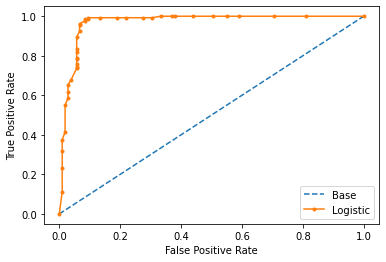

In [45]:
proba_pred = best_model.predict_proba(x_test_scaled)[:, 1]
plot_roc(y_test, proba_pred)

### Grid search
In Grid Search, we set up a grid of hyperparameters and train/test our model on each of the possible combinations.
In order to choose the parameters to use in Grid Search, we can now look at which parameters worked best with Random Search and form a grid based on them to see if we can find a better combination.

Grid Search can be implemented in Python using scikit-learn GridSearchCV() function.

In [46]:
# Perform hyperparameter tuning for a RandomForestClassifier using GridSearchCV with 36 model configurations.
rf_model_gridtuning = RandomForestClassifier(random_state=42)

grid_search = {'criterion': ['entropy', 'gini'],
                 'max_depth': [10, 20, None],
                 'max_features': ['sqrt', 'log2'],
                 'n_estimators': [50, 100, 200]}
# 2 x 3 x 2 x 3 = 36 => Total of 36 models from 36 possible model hyperparameter configs
# 1. RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=50)
# 2. RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', n_estimators=50)
# 3. RandomForestClassifier(criterion='entropy', max_depth=None, max_features='sqrt', n_estimators=50)
# 4. RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2', n_estimators=50)
# ... total of 36 models


grid_search_obj = GridSearchCV(estimator=rf_model_gridtuning, 
                               param_grid=grid_search,
                               scoring='f1', cv=3, verbose=5, n_jobs=-1)

grid_search_obj.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=5)

In [47]:
# Evaluate the accuracy of the best-tuned RandomForestClassifier on the test data.
y_pred_rf_gridtuning = grid_search_obj.best_estimator_.predict(x_test_scaled)
rf_gridtuned_acc = accuracy_score(y_pred_rf_gridtuning, y_test)
print('Grid Tuned Random Forest Accuracy: {:.2f}%'.format(rf_gridtuned_acc*100))

Grid Tuned Random Forest Accuracy: 93.70%


In [48]:
# Create a DataFrame to display the cross-validated F1-scores of model configurations and show the top-performing models.
cv_result_df = pd.DataFrame({
    'Model Rank': grid_search_obj.cv_results_['rank_test_score'],
    'Model Hyperparams': grid_search_obj.cv_results_['params'],
    'Avg CV F1-Score': grid_search_obj.cv_results_['mean_test_score'],
    'Std Dev CV F1-Score': grid_search_obj.cv_results_['std_test_score'],
    'CV Fold 1 F1-Score': grid_search_obj.cv_results_['split0_test_score'],
    'CV Fold 2 F1-Score': grid_search_obj.cv_results_['split1_test_score'],
    'CV Fold 3 F1-Score': grid_search_obj.cv_results_['split2_test_score']
})


cv_result_df.sort_values(by=['Model Rank'], ascending=True).head()

,Model Rank,Model Hyperparams,Avg CV F1-Score,Std Dev CV F1-Score,CV Fold 1 F1-Score,CV Fold 2 F1-Score,CV Fold 3 F1-Score
20,1,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.908421,0.019423,0.922156,0.922156,0.880952
23,1,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.908421,0.019423,0.922156,0.922156,0.880952
33,3,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.907000,0.021684,0.928144,0.915663,0.877193
24,3,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.907000,0.021684,0.928144,0.915663,0.877193
30,3,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.907000,0.021684,0.928144,0.915663,0.877193


In [49]:
grid_search_obj.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [50]:
print(classification_report(y_test, y_pred_rf_gridtuning))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       105
           1       0.95      0.94      0.94       133

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



In [51]:
cf = confusion_matrix(y_test, y_pred_rf_gridtuning)
confusion_matrix_plot(cf)

Logistic: ROC AUC=0.970


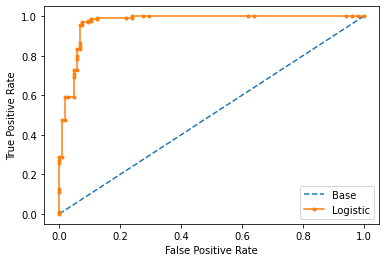

In [52]:
proba_pred = grid_search_obj.predict_proba(x_test_scaled)[:, 1]
plot_roc(y_test, proba_pred)

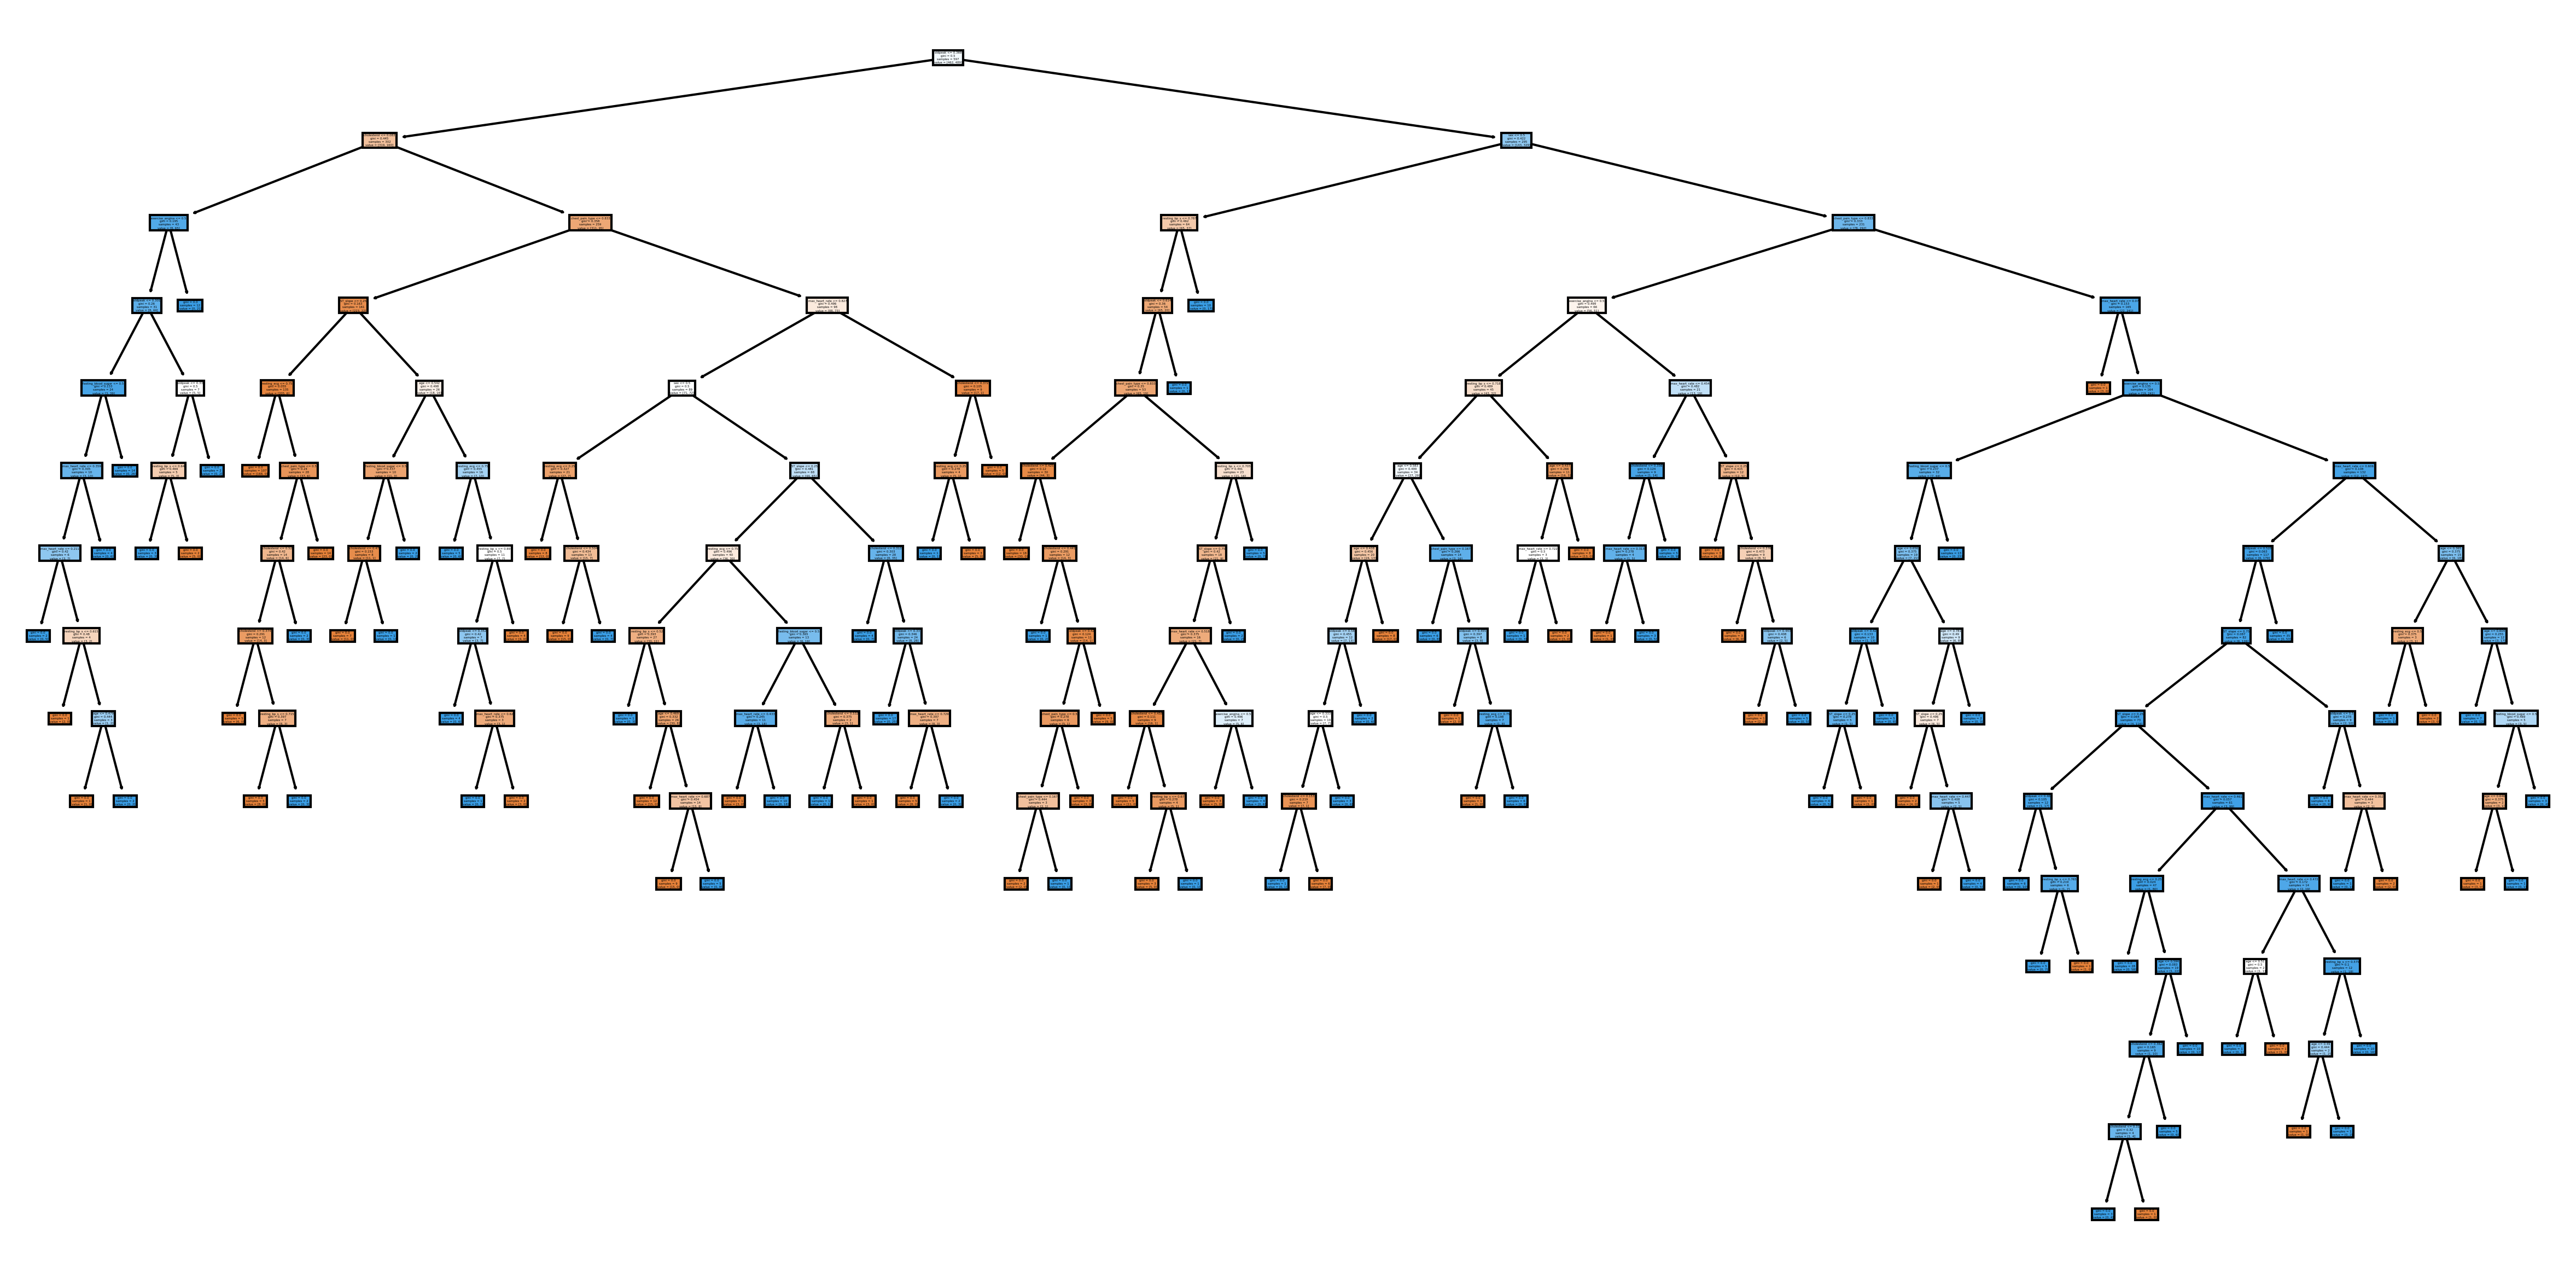

In [53]:
plt.figure(figsize=(20, 10), dpi=300)
_ = tree.plot_tree(best_model.estimators_[0], feature_names=x.columns, filled=True)
plt.show()

To what extent does the performance of our predictive model vary across different patient profiles?

We have two subgroups that we decided to split in order to check the difference in predictions especially because women are underrepresented in the dataset and because of the age difference and the increase probability of getting a heart disease with age but there are many other factors as well as it can happen in young age.

In [54]:
x_test_female = x_test[x_test['sex'] == 0]
x_test_male = x_test[x_test['sex'] == 1]

y_test_f = y_test.loc[x_test_female.index.values]
y_test_m = y_test.loc[x_test_male.index.values]

x_test_female_sc = scaler.transform(x_test_female)
x_test_male_sc = scaler.transform(x_test_male)

y_pred_f = best_model.predict(x_test_female_sc)
rf_f_acc = accuracy_score(y_pred_f, y_test_f)
print('Tuned Random Forest Accuracy for female: {:.2f}%'.format(rf_f_acc*100))

y_pred_m = best_model.predict(x_test_male_sc)
rf_m_acc = accuracy_score(y_pred_m, y_test_m)
print('Tuned Random Forest Accuracy for male: {:.2f}%'.format(rf_m_acc*100))

Tuned Random Forest Accuracy for female: 96.15%
Tuned Random Forest Accuracy for male: 94.62%


In [55]:
# age larger than 45 or smaller
x_test_more45 = x_test[x_test['age'] > 45]
x_test_less45 = x_test[x_test['age'] <= 45]

y_test_o = y_test.loc[x_test_more45.index.values]
y_test_y = y_test.loc[x_test_less45.index.values]

x_test_osc = scaler.transform(x_test_more45)
x_test_ysc = scaler.transform(x_test_less45)

y_pred_o = best_model.predict(x_test_osc)
rf_o_acc = accuracy_score(y_pred_o, y_test_o)
print('Tuned Random Forest Accuracy for patients older than 45: {:.2f}%'.format(rf_o_acc*100))

y_pred_y = best_model.predict(x_test_ysc)
rf_y_acc = accuracy_score(y_pred_y, y_test_y)
print('Tuned Random Forest Accuracy for patients older than 45: {:.2f}%'.format(rf_y_acc*100))

Tuned Random Forest Accuracy for patients older than 45: 95.14%
Tuned Random Forest Accuracy for patients older than 45: 94.34%


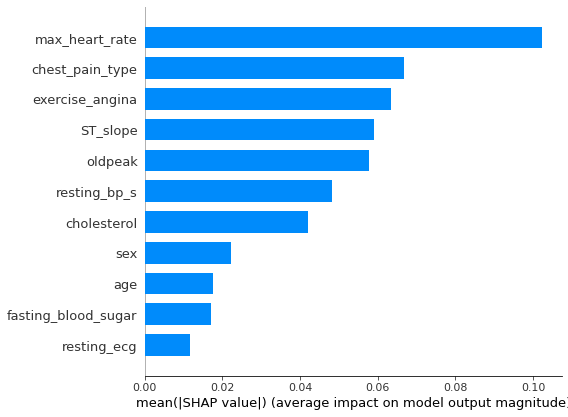

In [56]:
# shap explaining the model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_train)
# SHAP values explain the impact of each feature on the model's predictions.

# Generate a summary plot to visualize feature importance using SHAP values
shap.summary_plot(shap_values[1], x_test, plot_type="bar")
# This plot provides insights into the importance of each feature in the model's predictions, 
# particularly for class 1 (assuming binary classification).

In [57]:
# check when cholesterol level becomes a factor regarding heart disease
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
10,ST_slope,0.179670
2,chest_pain_type,0.131306
9,oldpeak,0.124589
7,max_heart_rate,0.118392
4,cholesterol,0.110776
0,age,0.088204
3,resting_bp_s,0.082373
8,exercise_angina,0.074558
1,sex,0.040148
6,resting_ecg,0.028727


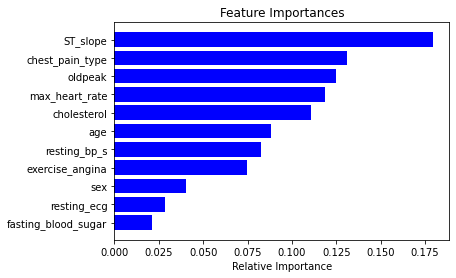

In [58]:
features = x.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
from shap import Explainer, Explanation

best_model_explainer = Explainer(best_model)
shap_v2 = best_model_explainer(x_train)
shap_v2.shape

(951, 11, 2)

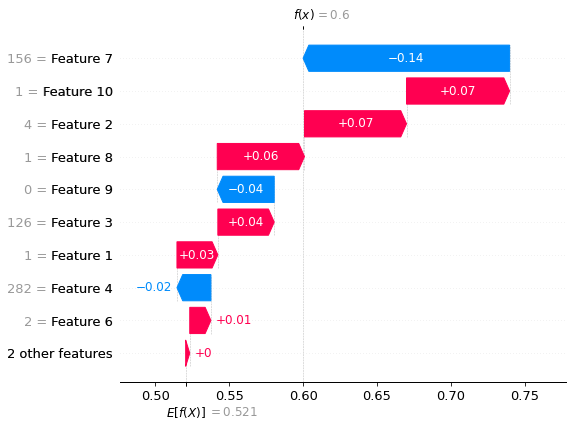

In [59]:
# Generate a SHAP waterfall plot for explaining a specific data point's prediction
shap_exp = Explanation(shap_v2[:,:,1], shap_v2.base_values[:,1], x_train, feature_names=None)
idx = 7 # datapoint to explain
shap.plots.waterfall(shap_exp[idx])

In [60]:
# data for prediction can be the new patient we want to check
data_for_prediction = x_test.iloc[1,:].astype(float)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [61]:
# SVC model and gridsearch
params = {'C' : [0.01,0.1,0.25,0.5,0.75,1,10,100],
         'gamma' : [1,0.75,0.5,0.25,0.1,0.01,0.001],
         'kernel': ['rbf','poly','linear']}

svc_model_grid = GridSearchCV(SVC(),params,refit=True)
svc_model_grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.25, 0.5, 0.75, 1, 10, 100],
                         'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']})

In [62]:
svc_model_grid.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'poly'}

In [63]:
best_svc_model = SVC(kernel='rbf', gamma=1, C=100)
best_svc_model.fit(x_train_scaled, y_train)

SVC(C=100, gamma=1)

In [64]:
# Evaluate the accuracy of the best Support Vector Classifier (SVC) model 
y_pred_svc = best_svc_model.predict(x_test_scaled)
svc_acc = accuracy_score(y_pred_svc, y_test)
print('Logistic Regression Accuracy: {:.2f}%'.format(svc_acc*100))

Logistic Regression Accuracy: 87.82%


In [65]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.93      0.85      0.89       133

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



In [66]:
cf = confusion_matrix(y_test, y_pred_svc)
confusion_matrix_plot(cf)

### Neural Network

In [67]:
# import modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1189 non-null   int64  
 1   sex                  1189 non-null   int64  
 2   chest_pain_type      1189 non-null   int64  
 3   resting_bp_s         1189 non-null   int64  
 4   cholesterol          1189 non-null   int64  
 5   fasting_blood_sugar  1189 non-null   int64  
 6   resting_ecg          1189 non-null   int64  
 7   max_heart_rate       1189 non-null   int64  
 8   exercise_angina      1189 non-null   int64  
 9   oldpeak              1189 non-null   float64
 10  ST_slope             1189 non-null   int64  
 11  target               1189 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 120.8 KB


In [69]:
len(x_train.columns)

11

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((951, 11), (238, 11))

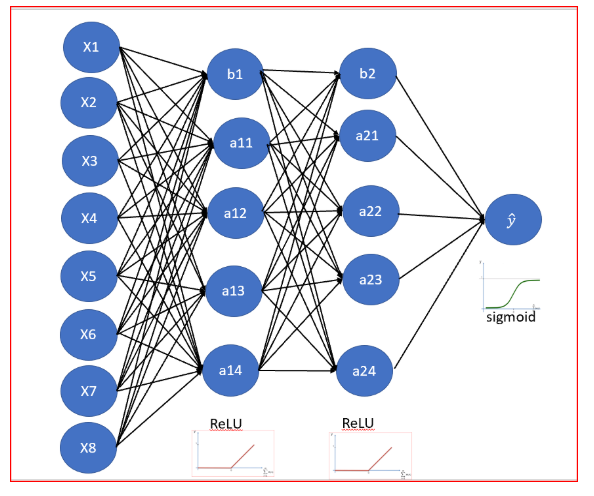

**Neuron**

Neuron becomes active, it undergoes a computation of its internal state. This computation involves summing up all the incoming inputs, each multiplied by its corresponding connection weight. Notably, neurons always include one extra input known as the bias, which remains constant at 1 and possesses its unique connection weight.

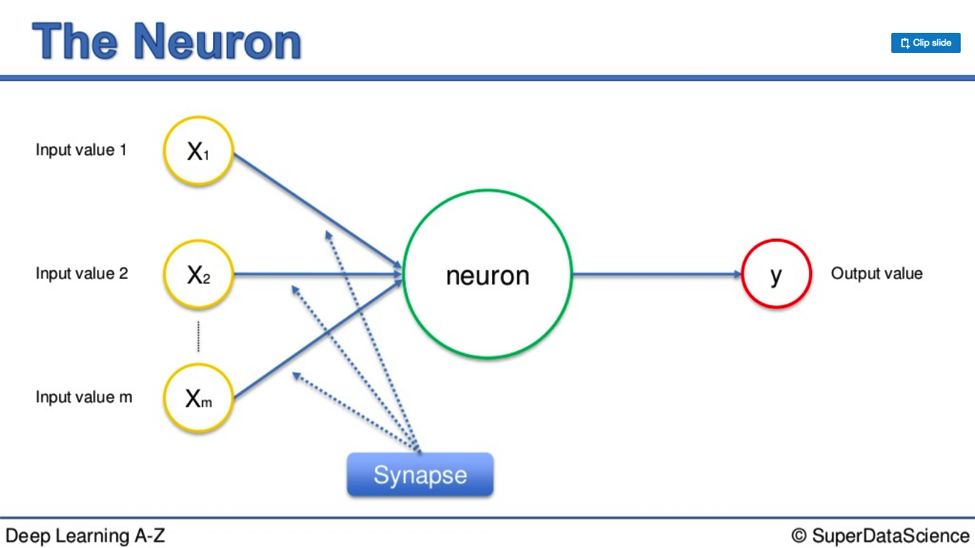

**Gradient Decent**

Gradient descent stands as a primary iterative optimization algorithm utilized to locate the minimum of a function. When employing gradient descent to seek a local minimum for a given function, one takes steps in proportion to the negative gradient (or an approximation of the gradient) of the function at the current position.

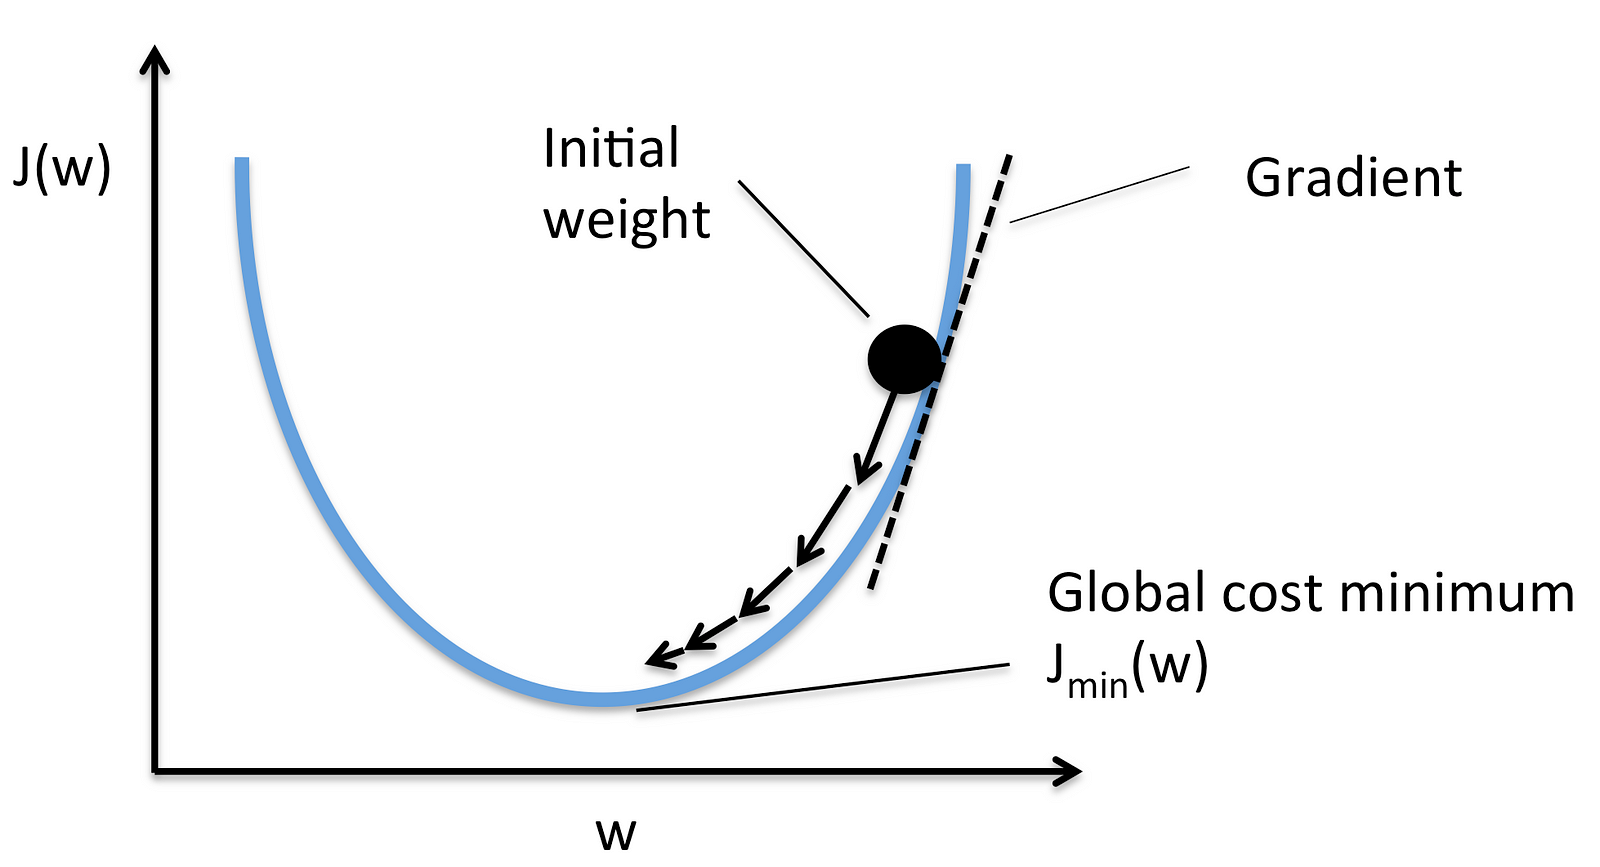

**Backpropagation**

Backpropagation, also referred to as backward propagation, plays a pivotal role in enhancing prediction accuracy within the realms of data mining and machine learning. Essentially, backpropagation is an algorithm designed for the swift calculation of derivatives. In the context of artificial neural networks, it serves as a learning mechanism to compute gradient descent concerning weights. It involves a process where desired outputs are compared to the actual system outputs, and subsequently, system performance is refined by adjusting the connection weights to minimize the disparity between the two to the greatest extent possible. This algorithm derives its name from the fact that weight updates occur in a reverse fashion, starting from the output layer and propagating back towards the input layer.

In [71]:
# Build a neural network model for binary classification
model = Sequential()

model.add(Dense(32, input_dim=11, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print('----------------------')
print('-----Done training----')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 0.6150 - accuracy: 0.6961 - val_loss: 0.5365 - val_accuracy: 0.7853
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8224 - val_loss: 0.4414 - val_accuracy: 0.8377
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8461 - val_loss: 0.4598 - val_accuracy: 0.8010
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8447 - val_loss: 0.4383 - val_accuracy: 0.8168
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.8474 - val_loss: 0.4474 - val_accuracy: 0.8115
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8513 - val_loss: 0.4468 - val_accuracy: 0.8115
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8605 - val_loss: 0.4409 - val_accuracy: 0.8063
Epoch 8/100


In [73]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

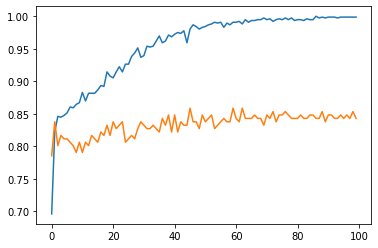

model training - finished


In [74]:
# Plot accuracy and finish training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.show()
print ("model training - finished")

In [75]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

8/8 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.8908
Accuracy: 0.8907563090324402


**Answer Question 2: How does age and gender influence the likelihood of developing heart disease?**

This question was answered with visualizations above but we were curious to see how it behaves with modeling.

In [76]:
# Data preparation: selection of relevant columns and splitting into training and test data
X = data[['age', 'sex']]  # independent variables: age and sex
y = data['target']  # dependent variable: heart disease

In [77]:
# Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and customize model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions for test data
y_pred = model.predict(X_test)

# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

# Interpretation of the coefficients for age and gender in the model
coefficients = model.coef_[0]
print('Coefficients for age and gender:')
print(f'Age: {coefficients[0]:.2f}')
print(f'Gender: {coefficients[1]:.2f}')

Accuracy of the model: 0.69
Coefficients for age and gender:
Age: 0.06
Gender: 1.58


Accuracy of the model: 0.68 (the model correctly predicted heart disease in 68% of cases.)   

Coefficients for age and sex:
Age: 0.07
Gender: 1.54

*Interpretation for age and gender:*

Age: 0.07: This means that for every unit (e.g., one year) increase in age, the log odds (the log likelihood) of heart disease increase by 0.07. This suggests that as individuals get older, their likelihood of developing heart disease slightly increases.

Gender: 1.54: The coefficient for "Gender" is 1.54. In this case, "Male" is coded positive, so the interpretation is that males have a higher risk of heart disease than females.

In [78]:
# obtain and print the intercept value
intercept = model.intercept_[0]
print(f'Intercept-Wert: {intercept:.2f}')

Intercept-Wert: -4.60


The intercept represents the log-odds of the target variable (heart disease) when all independent variables are set to zero. With an intercept value of -4.76, this means that the probability of someone having heart disease (when not accounting for independent variables such as age or gender) is quite low.

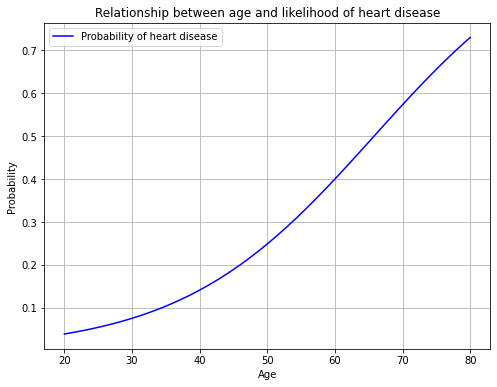

In [79]:
# import matplotlib.pyplot as plt
# import numpy as np

# Create 100 values for age (e.g. from 20 to 80 years)
age_values = np.linspace(20, 80, 100)
# Use the model to calculate the probabilities of heart disease
log_odds = 0.07 * age_values + intercept  
probability = 1 / (1 + np.exp(-log_odds))

# Plot the logistic regression curve
plt.figure(figsize=(8, 6))
plt.plot(age_values, probability, color='blue', label='Probability of heart disease')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Relationship between age and likelihood of heart disease')
plt.legend()
plt.grid(True)
plt.show()

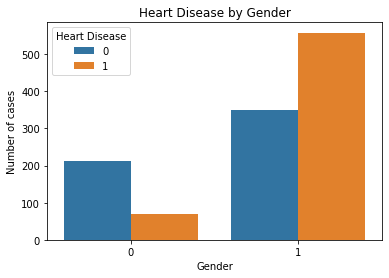

In [80]:
# Create a DataFrame with gender and heart disease
df = pd.DataFrame({'Gender': data['sex'], 'Heart Disease': data['target']})
df['Heart Disease'] = df['Heart Disease'].astype(str)
# Create a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Number of cases')
plt.title('Heart Disease by Gender')
plt.show()

In [81]:
import statsmodels.api as sm

# Data preparation: selection of relevant columns and addition of a constant (intercept)
X = data[['age', 'sex']]  # independent variable
y = data['target']  # dependent variable

In [82]:
# Adding a constant (intercept)
X = sm.add_constant(X)

# create model
model = sm.Logit(y, X)

# customize model
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.604118
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1189
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.1264
Time:                        15:44:22   Log-Likelihood:                -718.30
converged:                       True   LL-Null:                       -822.26
Covariance Type:            nonrobust   LLR p-value:                 7.045e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6701      0.429    -10.873      0.000      -5.512      -3.828
age            0.0650      0.


The low p-values of 0.000 indicate that it is very unlikely that the observed difference in the probability of heart disease between the sexes and when looking at age is random. 

**Answer to the question 2: 'How does age and gender influence the likelihood of developing heart disease?':** 
In summary, it can be said that both age and sex are important factors in predicting heart disease and contribute significantly to explaining variability.


Age has a positive but relatively small effect on the likelihood of developing heart disease, with the risk increasing slightly with age.
Gender has a more substantial impact, with males having a significantly higher likelihood of developing heart disease compared to females, as suggested by the coefficient of 1.54.

### Partial Dependence Display

This method helps you visualize the relationship between a single feature (in this case we chose "age") and the model's predictions by holding all other features constant. It allows us to see if there are any non linear relationships or interactions between age and the predicted outcome, providing insights into the feature's importance and its impact on the model's performance.

In [83]:
# Prepare data for partial dependence analysis
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

x = data.drop(['target'], axis=1)
y = data['target']

x.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope'],
      dtype='object')

Age is the first feature so we can input it in the partial dependence plot

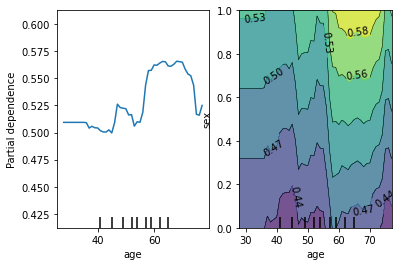

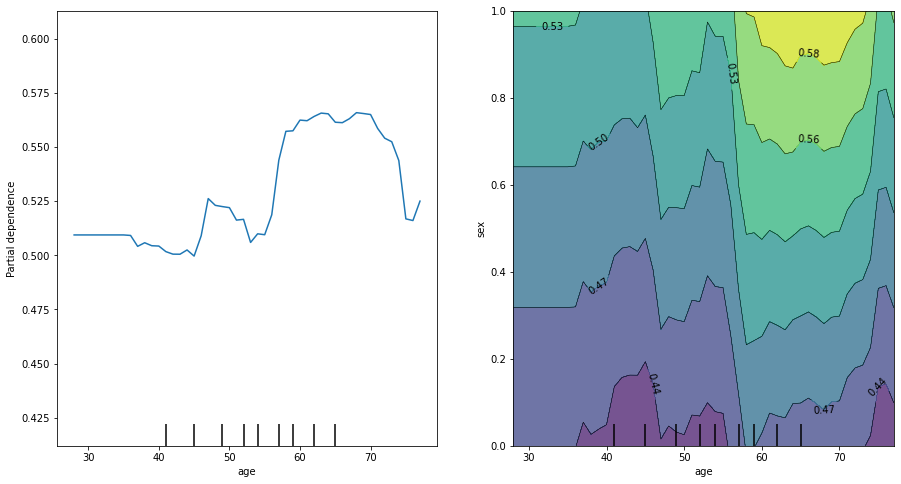

In [84]:
# Split the data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Random Forest model with the best parameters
random_forest_model = RandomForestClassifier(n_estimators = 50, max_features='sqrt', max_depth=None, criterion= 'gini', random_state=42)
random_forest_model.fit(X_train, y_train)

# Create the partial dependence plot
# 0 - the index of our feature
pdp = PartialDependenceDisplay.from_estimator(random_forest_model, x, [0, (0, 1)])

# Set the width of the plot (you can adjust the values as needed)
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the width (12) to your preference
pdp.plot(ax=ax)
plt.show()


Interpretation: "Partial Dependence Plot" is shown here, due to the variable age. This plot shows how age affects the probability of heart disease, while we hold other factors constant. For example, how does the probability of heart disease change due to age alone, independent of other factors?

Between the ages of 53 and 60, there is a sharp increase in the Partial Dependence Plot. This means that between the ages of 53 and 60, the probability of heart disease increases significantly. The value increases from 0.52 to 0.59 in the Partial Dependence Plot, which is a rather striking change. 